### Imports

In [ ]:
# ! pip install xlrd==1.2.0

In [16]:
import os
import time
import numpy as np
import pandas as pd
import csv
import math
import random
import xlrd

### Load SIDER4 

In [17]:
sider_df = pd.read_csv("../../raw_data/sider/meddra_all_se.tsv",
                        sep='\t', header=None)
sider_df.columns = ["STITCH_STEREO", "STITCH_FLAT", "D_UMLS_ID", "MEDDRA_TYPE", "SE_UMLS_ID", "MEDDRA_CONCEPT_NAME"]
sider_df.head(1)

,STITCH_STEREO,STITCH_FLAT,D_UMLS_ID,MEDDRA_TYPE,SE_UMLS_ID,MEDDRA_CONCEPT_NAME
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps


In [18]:
se_uml_id_name = {umls_id: umls_name.lower() for umls_id, umls_name in zip(sider_df.SE_UMLS_ID, sider_df.MEDDRA_CONCEPT_NAME)}

In [19]:
se_uml_id_name

{'C0000729': 'abdominal cramps',
 'C0000737': 'abdominal pain',
 'C0687713': 'gastrointestinal pain',
 'C0002418': 'amblyopia',
 'C0002871': 'anaemia',
 'C0003123': 'anorexia',
 'C0232462': 'decreased appetite',
 'C0003467': 'anxiety',
 'C0003811': 'arrhythmia',
 'C0004093': 'asthenia',
 'C0004238': 'atrial fibrillation',
 'C0004604': 'back pain',
 'C0006277': 'bronchitis',
 'C0007222': 'cardiovascular disorder',
 'C0008031': 'chest pain',
 'C0009450': 'infection',
 'C0009806': 'constipation',
 'C0010200': 'cough',
 'C0011570': 'depression',
 'C0011991': 'diarrhoea',
 'C0012833': 'dizziness',
 'C0013378': 'dysgeusia',
 'C0013395': 'dyspepsia',
 'C0013404': 'dyspnoea',
 'C0015230': 'rash',
 'C0011603': 'dermatitis',
 'C0015397': 'eye disorder',
 'C0015967': 'body temperature increased',
 'C0017152': 'gastritis',
 'C0017178': 'gastrointestinal disorder',
 'C0018681': 'headache',
 'C0019080': 'haemorrhage',
 'C0518015': 'haemoglobin',
 'C0020437': 'hypercalcaemia',
 'C0020461': 'hyperkala

In [20]:
df_prep = pd.read_csv("../../prep_data/drug_all_se_pubchem.csv")


In [21]:
df_prep['MEDRA TERM UMLS CONCEPT ID'].tolist()[0]

"['C0002792', 'C0030193', 'C0151828', 'C0002994', 'C0042109']"

In [22]:
all_uniq_se = list(set([se for se_list in df_prep['MEDRA TERM UMLS CONCEPT ID'].tolist() for se in eval(se_list)]))
len(all_uniq_se), all_uniq_se[:10]

(2061,
 ['C0033777',
  'C0235270',
  'C1096274',
  'C1720775',
  'C0333516',
  'C0241166',
  'C0014591',
  'C0027441',
  'C0235874',
  'C0020538'])

In [23]:
prep_se_uml_id_name = {se: se_uml_id_name.get(se) for se in all_uniq_se}

In [24]:
prep_se_uml_name_id = {umls_name: umls_id for umls_id, umls_name in prep_se_uml_id_name.items()}

### Define Utility read write csv/xlsx files

In [25]:
def ReadMyCsv(SaveList, fileName):
    csv_reader = csv.reader(open(fileName))
    for row in csv_reader:
        SaveList.append(row)
    return

def StorFile(data, fileName):
    with open(fileName, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)
    return

### Read List of Side-Effect

In [26]:
# # load files
# FinalAllDisease = []
# ReadMyCsv(FinalAllDisease, "side_effect.csv")
# # ReadMyCsv(FinalAllDisease, "disease.csv")
# FinalAllDisease = np.array(FinalAllDisease)[:, 0]
# print(len(FinalAllDisease))
# print(FinalAllDisease[1])
# # FinalAllDisease = FinalAllDisease[0:100]



In [27]:
# FinalAllDisease[:4]

In [28]:
FinalAllDisease = list(prep_se_uml_id_name.values())
FinalAllDisease[:4]

['pruritus genital',
 'keratopathy',
 'corneal thinning',
 'renal tubular necrosis']

In [29]:
len(FinalAllDisease)

2061

### Read ADRECs 

In [30]:
import pandas as pd

In [31]:
# ! pip install openpyxl

In [32]:
adrec_df = pd.read_excel('ADR_Drug.xlsx', header=None)
adrec_df.head(1)

,0,1,2,3
0,5'nucleotidase increased,Lasofoxifene,13.03.01.036,5'nucleotidase increased


In [33]:
# DiseaseMeSHTreeStructure = []
# # ReadMyCsv(DiseaseMeSHTreeStructure, "MeSHTreeStructureLow.csv")
# # print(len(DiseaseMeSHTreeStructure))
# # print(DiseaseMeSHTreeStructure[0])

# data1 = xlrd.open_workbook('ADR_Drug.xls')
# table1 = data1.sheet_by_name('Sheet 1')
# for i in range(table1.nrows):
#     x = table1.cell(i, 3).value
#     y = table1.cell(i, 2).value
#     y = y.split('.')
#     if len(y) == 4:
#         y1 = 'a'+y[0]
#         y2 = '0'+y[1]
#         y3 = '0'+y[2]
#         y = y1+'.' + y2 + '.' + y3 + '.' + y[3]
#     if len(y) == 3:
#         y1 = 'a' + y[0]
#         y2 = '0' + y[1]
#         y3 = '0' + y[2]
#         y = y1 + '.' + y2 + '.' + y3
#     if len(y) == 2:
#         y1 = 'a' + y[0]
#         y2 = '0' + y[1]
#         y = y1 + '.' + y2
#     if len(y) == 1:
#         y = 'a' + y[0]
#     DiseaseMeSHTreeStructure.append([x, y])

# DiseaseMeSHTreeStructure[:2]

In [34]:
def standardize_adrec(y):
    y = y.split('.')
    if len(y) == 4:
        y1 = 'a'+y[0]
        y2 = '0'+y[1]
        y3 = '0'+y[2]
        y = y1+'.' + y2 + '.' + y3 + '.' + y[3]
    if len(y) == 3:
        y1 = 'a' + y[0]
        y2 = '0' + y[1]
        y3 = '0' + y[2]
        y = y1 + '.' + y2 + '.' + y3
    if len(y) == 2:
        y1 = 'a' + y[0]
        y2 = '0' + y[1]
        y = y1 + '.' + y2
    if len(y) == 1:
        y = 'a' + y[0]
    
    return y


In [35]:
adrec_df.iloc[:, 2] = adrec_df.iloc[:, 2].apply(standardize_adrec)
adrec_df.head(1)

,0,1,2,3
0,5'nucleotidase increased,Lasofoxifene,a13.003.001.036,5'nucleotidase increased


In [36]:
DiseaseMeSHTreeStructure = adrec_df.iloc[:, 2:4].values.tolist()
# swap the order of the two columns
DiseaseMeSHTreeStructure = [[y, x] for x, y in DiseaseMeSHTreeStructure]

In [37]:
DiseaseMeSHTreeStructure[:2]

[["5'nucleotidase increased", 'a13.003.001.036'],
 ['abasia', 'a17.002.005.035']]

In [38]:
AllDisease = FinalAllDisease
mesh = DiseaseMeSHTreeStructure

### Get all mesh id for each side_effect in AllDisease using mesh

In [39]:
# DiseaseAndMeshID = []
# counter1 = 0
# while counter1 < len(AllDisease):
#     DiseaseAndMeshPair = []
#     DiseaseAndMeshID.append(DiseaseAndMeshPair)
#     DiseaseAndMeshID[counter1].append(AllDisease[counter1])
#     counter2 = 0
#     flag = 0
#     while counter2 < len(mesh):
#         if (mesh[counter2][0] == DiseaseAndMeshID[counter1][0]) & (flag == 1):
#             DiseaseAndMeshID[counter1][1].append(mesh[counter2][1])
#         if (mesh[counter2][0] == DiseaseAndMeshID[counter1][0]) & (flag == 0):
#             MeshID = []
#             MeshID.append(mesh[counter2][1])
#             DiseaseAndMeshID[counter1].append(MeshID)
#             flag = 1
#         if (counter2 == len(mesh) - 1) & (len(DiseaseAndMeshID[counter1]) == 1):
#             DiseaseAndMeshID[counter1].append(0)
#         counter2 = counter2 + 1
#     counter1 = counter1 + 1
# print('DiseaseAndMeshID')
# print(len(DiseaseAndMeshID))
# print(DiseaseAndMeshID[-3:])
# StorFile(DiseaseAndMeshID, 'DiseaseAndMeshID2.csv')

In [40]:
mesh[:3]

[["5'nucleotidase increased", 'a13.003.001.036'],
 ['abasia', 'a17.002.005.035'],
 ['abasia', 'a08.001.002.007']]

In [41]:
DiseaseAndMeshID = []

for se_idx, se_name in enumerate(AllDisease):
    mesh_id = []
    for mesh_idx, mesh_name in enumerate(mesh):
        if mesh_name[0] == se_name:
            mesh_id.append(mesh_name[1])
    if len(mesh_id) == 0:
        mesh_id = 0
        
    DiseaseAndMeshID.append([se_name, mesh_id])

print('DiseaseAndMeshID')
print(len(DiseaseAndMeshID))
print(DiseaseAndMeshID[-3:])

DiseaseAndMeshID
2061
[['acute febrile neutrophilic dermatosis', ['a01.002.001.006', 'a23.003.003.033']], ['thyroid disorder', ['a05.002.001.002']], ['faecaloma', ['a07.001.003.004']]]


In [42]:
DiseaseAndMeshID[:10]

[['pruritus genital', ['a23.003.012.008', 'a21.010.001.002']],
 ['keratopathy', ['a06.006.003.007']],
 ['corneal thinning', ['a06.006.003.009']],
 ['renal tubular necrosis', ['a20.001.007.003']],
 ['tumour necrosis', ['a16.032.003.009', 'a24.004.002.013']],
 ['skin tightness', ['a23.003.003.018']],
 ['epistaxis', ['a24.007.001.005', 'a22.004.003.001']],
 ['nasopharyngitis', ['a11.001.013.002', 'a22.007.003.002']],
 ['condition aggravated', ['a08.001.003.004']],
 ['hypertension', ['a24.008.002.001']]]

In [43]:
DiseaseAndMeshID[:10]

[['pruritus genital', ['a23.003.012.008', 'a21.010.001.002']],
 ['keratopathy', ['a06.006.003.007']],
 ['corneal thinning', ['a06.006.003.009']],
 ['renal tubular necrosis', ['a20.001.007.003']],
 ['tumour necrosis', ['a16.032.003.009', 'a24.004.002.013']],
 ['skin tightness', ['a23.003.003.018']],
 ['epistaxis', ['a24.007.001.005', 'a22.004.003.001']],
 ['nasopharyngitis', ['a11.001.013.002', 'a22.007.003.002']],
 ['condition aggravated', ['a08.001.003.004']],
 ['hypertension', ['a24.008.002.001']]]

### Create DAGs leaf element for each side_effect using AllDisease

In [44]:
# DAGs = []
# counter1 = 0
# while counter1 < len(AllDisease):
#     group = []
#     group.extend(DiseaseAndMeshID[counter1])
#     group.append(0)
#     group1 = []
#     group1.append(group)
#     DAGs.append(group1)
#     counter1 = counter1 + 1
# print('len(DAGs)', len(DAGs))
# StorFile(DAGs, 'DAGsLeaf2.csv')
# DAGs[-3:]

In [45]:
# dags using list comprehension
DAGs = [[[se_name, mesh_id, 0]] for se_name, mesh_id in DiseaseAndMeshID]

In [46]:
DAGs[-3:]

[[['acute febrile neutrophilic dermatosis',
   ['a01.002.001.006', 'a23.003.003.033'],
   0]],
 [['thyroid disorder', ['a05.002.001.002'], 0]],
 [['faecaloma', ['a07.001.003.004'], 0]]]

In [47]:
DAGs[:10]

[[['pruritus genital', ['a23.003.012.008', 'a21.010.001.002'], 0]],
 [['keratopathy', ['a06.006.003.007'], 0]],
 [['corneal thinning', ['a06.006.003.009'], 0]],
 [['renal tubular necrosis', ['a20.001.007.003'], 0]],
 [['tumour necrosis', ['a16.032.003.009', 'a24.004.002.013'], 0]],
 [['skin tightness', ['a23.003.003.018'], 0]],
 [['epistaxis', ['a24.007.001.005', 'a22.004.003.001'], 0]],
 [['nasopharyngitis', ['a11.001.013.002', 'a22.007.003.002'], 0]],
 [['condition aggravated', ['a08.001.003.004'], 0]],
 [['hypertension', ['a24.008.002.001'], 0]]]

In [48]:
mesh[:4]

[["5'nucleotidase increased", 'a13.003.001.036'],
 ['abasia', 'a17.002.005.035'],
 ['abasia', 'a08.001.002.007'],
 ['abdominal abscess', 'a11.001.007.006']]

In [49]:
DAGs_with_ancestors_all = []

for DAG in DAGs:
    if DAG[0][1] == 0: # if no leaf found
        DAGs_with_ancestors_all.append(DAG)
    else:
        # find ancestors for all possible leafs
        DAGs_with_ancestors = []
        DAGs_with_ancestors.append(DAG[0])
        # layer = DAG[0][2]
        counter = 0
        while counter < len(DAGs_with_ancestors):
            # ancestors_id_list = DAGs_with_ancestors[counter][1]
            for syn_se in DAGs_with_ancestors[counter][1]:
                layer = DAGs_with_ancestors[counter][2]
                if len(syn_se) > 3:
                    L = len(syn_se)
                    NID = syn_se[0:L - 4]
                    for se_mesh in mesh:
                        if NID == se_mesh[1]:
                            DiseaseName = se_mesh[0]
                            if DiseaseName not in [_[0][0] for _ in DAGs_with_ancestors]:
                                id_group = []
                                # loop in mesh to find id_group for any matching Disease name
                                for se_mesh_ in mesh:
                                    if DiseaseName == se_mesh_[0]:
                                        id_group.append(se_mesh_[1])
                                        # ancestors_id_list.append(se_mesh_[1])
                                DAGs_with_ancestors.append([DiseaseName, id_group, layer + 1])
            counter = counter + 1
            
                
        DAGs_with_ancestors_all.append(DAGs_with_ancestors)

            


In [50]:
DAGs[1][0][1]

['a06.006.003.007']

In [51]:
DAGs_with_ancestors_all[1010]

[['idiopathic thrombocytopenic purpura',
  ['a01.008.001.001', 'a10.004.001.002'],
  0],
 ['thrombocytopenias', ['a01.008.001'], 1],
 ['blood autoimmune disorders', ['a10.004.001'], 1],
 ['platelet disorders', ['a01.008'], 2],
 ['autoimmune disorders', ['a10.004'], 2],
 ['blood and lymphatic system disorders', ['a01'], 3],
 ['immune system disorders', ['a10'], 3]]

In [52]:
StorFile(DAGs_with_ancestors_all, 'DAGs2_sider.csv')

### Find ancestors and create set of nodes of ancestor for each disease

In [53]:
# counter = 0
# while counter < len(DAGs):
#     print(DAGs[counter][0][1])
#     print(len(DAGs[counter]))

#     if DAGs[counter][0][1] == 0:
#         counter = counter + 1
#         continue
#     counter1 = 0
#     while counter1 < len(DAGs[counter]):  #################
#         counter2 = 0
#         while counter2 < len(DAGs[counter][counter1][1]):
#             layer = DAGs[counter][counter1][2]  #######################
#             # if len(DAGs[0][counter1][1][counter2]) <= 3:
#             #     break
#             print(len(DAGs[counter][counter1][1]))
#             print(layer)
#             print(len(DAGs[counter][counter1][1][counter2]))
#             if len(DAGs[counter][counter1][1][counter2]) > 3:  #################### 'a07.001.006.001'
#                 NID = DAGs[counter][counter1][1][counter2]  #####################
#                 print(NID)
#                 L = len(NID)
#                 NID = NID[0:L - 4]
#                 print(NID)
#                 counter3 = 0
#                 flag = 1
#                 while counter3 < len(mesh):
#                     print(len(mesh))
#                     print(mesh[counter3][1])
#                     print(mesh[counter3][0])
#                     if NID == mesh[counter3][1]:
         
#                         flag = 0
#                         num = counter3
#                         DiseaseName = mesh[counter3][0]
#                         break
#                     counter3 = counter3 + 1

#                 flag2 = 0
#                 counter5 = 0
#                 while counter5 < len(DAGs[counter]):
#                     if DAGs[counter][counter5][0] == DiseaseName:
#                         flag2 = 1
#                         break
#                     counter5 = counter5 + 1

#                 if flag == 0:
#                     if flag2 == 0:
#                         counter6 = 0
#                         IDGroup = []
#                         while counter6 < len(mesh):
#                             if DiseaseName == mesh[counter6][0]:
#                                 IDGroup.append(mesh[counter6][1])
#                             counter6 = counter6 + 1
#                         DiseasePoint = []
#                         layer = layer + 1
#                         DiseasePoint.append(DiseaseName)
#                         DiseasePoint.append(IDGroup)
#                         DiseasePoint.append(layer)
#                         DAGs[counter].append(DiseasePoint)

#             counter2 = counter2 + 1
#         counter1 = counter1 + 1
#     counter = counter + 1
# print('DAGs', len(DAGs))
# StorFile(DAGs, 'DAGs2.csv')

### Load processed DAGs with ancestors id

In [54]:
# load DAGs 
DAGs = []
ReadMyCsv(DAGs, "DAGs2.csv")
print(len(DAGs))
print(DAGs[0])


994
["['abdominal discomfort', ['a07.001.006.001'], 0]", "['gastrointestinal signs and symptoms nec', ['a07.001.006'], 1]", "['gastrointestinal signs and symptoms', ['a07.001'], 2]", "['gastrointestinal disorders', ['a07'], 3]"]


In [55]:
DAGs[0][0]

"['abdominal discomfort', ['a07.001.006.001'], 0]"

In [56]:
eval(DAGs[0][0])[1]

['a07.001.006.001']

In [57]:
# load DAGs 
DAGs = []
ReadMyCsv(DAGs, "DAGs2_sider.csv")
print(len(DAGs))
print(DAGs[0])


2061
["['pruritus genital', ['a23.003.012.008', 'a21.010.001.002'], 0]", "['pruritus nec', ['a23.003.012'], 1]", "['reproductive tract signs and symptoms nec', ['a21.010.001'], 1]", "['epidermal and dermal conditions', ['a23.003'], 2]", "['reproductive tract disorders nec', ['a21.010'], 2]", "['skin and subcutaneous tissue disorders', ['a23'], 3]", "['reproductive system and breast disorders', ['a21'], 3]"]


#### Quick fix with data types

In [58]:
# fix DAGs data type eval(DAGs[0][0])
def quick_fix_data_types(DAGs):
    DAGs2 = []
    counter = 0

    while counter < len(DAGs):
        counter1 = 0
        DAGs2.append([])
        while counter1 < len(DAGs[counter]):
            DAGs2[counter].append([])
            DAGs2[counter][counter1].append(eval(DAGs[counter][counter1])[0])
            DAGs2[counter][counter1].append(eval(DAGs[counter][counter1])[1])
            DAGs2[counter][counter1].append(eval(DAGs[counter][counter1])[2])
            counter1 = counter1 + 1
        counter = counter + 1
    print(len(DAGs2))
    print(DAGs2[0])
    return DAGs2

In [59]:
DAGs2 = quick_fix_data_types(DAGs)

DAGs2

2061
[['pruritus genital', ['a23.003.012.008', 'a21.010.001.002'], 0], ['pruritus nec', ['a23.003.012'], 1], ['reproductive tract signs and symptoms nec', ['a21.010.001'], 1], ['epidermal and dermal conditions', ['a23.003'], 2], ['reproductive tract disorders nec', ['a21.010'], 2], ['skin and subcutaneous tissue disorders', ['a23'], 3], ['reproductive system and breast disorders', ['a21'], 3]]


[[['pruritus genital', ['a23.003.012.008', 'a21.010.001.002'], 0],
  ['pruritus nec', ['a23.003.012'], 1],
  ['reproductive tract signs and symptoms nec', ['a21.010.001'], 1],
  ['epidermal and dermal conditions', ['a23.003'], 2],
  ['reproductive tract disorders nec', ['a21.010'], 2],
  ['skin and subcutaneous tissue disorders', ['a23'], 3],
  ['reproductive system and breast disorders', ['a21'], 3]],
 [['keratopathy', ['a06.006.003.007'], 0],
  ['corneal structural change, deposit and degeneration', ['a06.006.003'], 1],
  ['anterior eye structural change, deposit and degeneration', ['a06.006'], 2],
  ['eye disorders', ['a06'], 3]],
 [['corneal thinning', ['a06.006.003.009'], 0],
  ['corneal structural change, deposit and degeneration', ['a06.006.003'], 1],
  ['anterior eye structural change, deposit and degeneration', ['a06.006'], 2],
  ['eye disorders', ['a06'], 3]],
 [['renal tubular necrosis', ['a20.001.007.003'], 0],
  ['renal vascular and ischaemic conditions', ['a20.001.007'], 

In [60]:
DAGs2[:20]

[[['pruritus genital', ['a23.003.012.008', 'a21.010.001.002'], 0],
  ['pruritus nec', ['a23.003.012'], 1],
  ['reproductive tract signs and symptoms nec', ['a21.010.001'], 1],
  ['epidermal and dermal conditions', ['a23.003'], 2],
  ['reproductive tract disorders nec', ['a21.010'], 2],
  ['skin and subcutaneous tissue disorders', ['a23'], 3],
  ['reproductive system and breast disorders', ['a21'], 3]],
 [['keratopathy', ['a06.006.003.007'], 0],
  ['corneal structural change, deposit and degeneration', ['a06.006.003'], 1],
  ['anterior eye structural change, deposit and degeneration', ['a06.006'], 2],
  ['eye disorders', ['a06'], 3]],
 [['corneal thinning', ['a06.006.003.009'], 0],
  ['corneal structural change, deposit and degeneration', ['a06.006.003'], 1],
  ['anterior eye structural change, deposit and degeneration', ['a06.006'], 2],
  ['eye disorders', ['a06'], 3]],
 [['renal tubular necrosis', ['a20.001.007.003'], 0],
  ['renal vascular and ischaemic conditions', ['a20.001.007'], 

In [61]:
DAGs = DAGs2

### Calculate Side effect semantic value using ancenstors collected in DAGs 

In [62]:
DiseaseValue = []
counter = 0
while counter < len(AllDisease):
    if DAGs[counter][0][1] == 0:
        DiseaseValuePair = []
        DiseaseValuePair.append(AllDisease[counter])
        DiseaseValuePair.append(0)
        DiseaseValue.append(DiseaseValuePair)
        counter = counter + 1
        continue
    counter1 = 0
    DV = 0
    while counter1 < len(DAGs[counter]):
        DV = DV + math.pow(0.5, DAGs[counter][counter1][2])
        counter1 = counter1 + 1
    DiseaseValuePair = []
    DiseaseValuePair.append(AllDisease[counter])
    DiseaseValuePair.append(DV)
    DiseaseValue.append(DiseaseValuePair)
    counter = counter + 1
print('len(DiseaseValue)', len(DiseaseValue))
StorFile(DiseaseValue, 'DiseaseValue2.csv')

len(DiseaseValue) 2061


In [63]:
DiseaseValue[:2]

[['pruritus genital', 2.75], ['keratopathy', 1.875]]

In [64]:
DiseaseValue[:5]

[['pruritus genital', 2.75],
 ['keratopathy', 1.875],
 ['corneal thinning', 1.875],
 ['renal tubular necrosis', 1.875],
 ['tumour necrosis', 2.75]]

### Compute Side effect similarity

#### Common/ Same Value

In [65]:
SameValue1 = []
counter = 0
while counter < len(AllDisease):
    RowValue = []
    if DiseaseValue[counter][1] == 0:
        counter1 = 0
        while counter1 < len(AllDisease):
            RowValue.append(0)
            counter1 = counter1 + 1
        SameValue1.append(RowValue)
        counter = counter + 1
        continue
    counter1 = 0
    while counter1 < len(AllDisease):
        if DiseaseValue[counter1][1] == 0:
            RowValue.append(0)
            counter1 = counter1 + 1
            continue
        DiseaseAndDiseaseSimilarityValue = 0
        counter2 = 0
        while counter2 < len(DAGs[counter]):
            counter3 = 0
            while counter3 < len(DAGs[counter1]):
                if DAGs[counter][counter2][0] == DAGs[counter1][counter3][0]:
                    DiseaseAndDiseaseSimilarityValue = DiseaseAndDiseaseSimilarityValue + math.pow(0.5, DAGs[counter][counter2][2]) + math.pow(0.5, DAGs[counter1][counter3][2]) #自己和自己的全部节点相同，对角线即DiseaseValue的两倍
                counter3 = counter3 + 1
            counter2 = counter2 + 1
        RowValue.append(DiseaseAndDiseaseSimilarityValue)
        counter1 = counter1 + 1
    SameValue1.append(RowValue)
    print(counter)
    counter = counter + 1
print('SameValue1')
StorFile(SameValue1, 'Samevalue12.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
84
85
86
87
88
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
196
197
198
199
200
201
202
203
204
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282


#### Final SE Semantica similarity using common|intersection / union 

In [66]:
DiseaseSimilarityModel1 = []
counter = 0
while counter < len(AllDisease):
    RowValue = []
    if DiseaseValue[counter][1] == 0:
        counter1 = 0
        while counter1 < len(AllDisease):
            RowValue.append(0)
            counter1 = counter1 + 1
        DiseaseSimilarityModel1.append(RowValue)
        counter = counter + 1
        continue
    counter1 = 0
    while counter1 < len(AllDisease):
        if DiseaseValue[counter1][1] == 0:
            RowValue.append(0)
            counter1 = counter1 + 1
            continue
        value = SameValue1[counter][counter1] / (DiseaseValue[counter][1] + DiseaseValue[counter1][1])
        RowValue.append(value)
        counter1 = counter1 + 1
    DiseaseSimilarityModel1.append(RowValue)
    print(counter)
    counter = counter + 1
print('DiseaseSimilarityModel1，', len(DiseaseSimilarityModel1))
print('DiseaseSimilarityModel1[0]', len(DiseaseSimilarityModel1[0]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
84
85
86
87
88
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
196
197
198
199
200
201
202
203
204
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282


### Dump Similarity Values

In [67]:


counter = 0
while counter < len(DiseaseSimilarityModel1):
    Row = []
    Row.append(AllDisease[counter])
    Row.extend(DiseaseSimilarityModel1[counter])
    DiseaseSimilarityModel1[counter] = Row
    counter = counter + 1


StorFile(DiseaseSimilarityModel1, 'Side_effect_SimilarityModel.csv')

### Read SE similarity and sanity check

In [68]:
import pandas as pd

df = pd.read_csv("Side_effect_SimilarityModel.csv", header=None)
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061
0,pruritus genital,1.0,0.0,0.0,0.0,0.0,0.162162,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.136364,0.0,0.0


In [69]:
df

,0,1,2,3,4,5,6,7,8,9,...,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061
0,pruritus genital,1.000000,0.000000,0.000000,0.0,0.0,0.162162,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.117647,0.0,0.136364,0.0,0.0
1,keratopathy,0.000000,1.000000,0.466667,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,corneal thinning,0.000000,0.466667,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,renal tubular necrosis,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.066667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,tumour necrosis,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.045455,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.378378,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,scleroderma,0.117647,0.000000,0.000000,0.0,0.0,0.136364,0.000000,0.0,0.0,...,0.034483,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.117647,0.0,0.0
2057,hypokalaemia,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.045455,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.0
2058,acute febrile neutrophilic dermatosis,0.136364,0.000000,0.000000,0.0,0.0,0.378378,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.117647,0.0,1.000000,0.0,0.0
2059,thyroid disorder,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0


In [70]:
df.iloc[:, 1:].values.flatten().max()

2.75

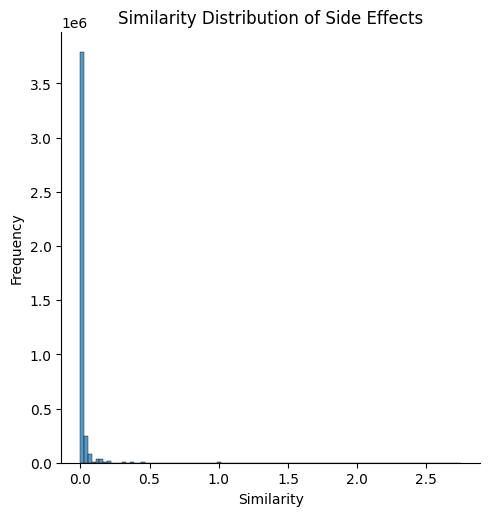

In [71]:
# df contains the similarity matrix, plot histogram for the similarity values
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df.iloc[:, 1:].values.flatten(), kde=False, bins=100)

# df.iloc[:, 1:].values.flatten().max()

# df.iloc[:, 1:].values.flatten().min()

# df.iloc[:, 1:].values.flatten().mean()

# df.iloc[:, 1:].values.flatten().std()


# # plot min, max, mean, median, std line on plot
# plt.axvline(df.iloc[:, 1:].values.flatten().max(), color='r', linestyle='--')
# plt.axvline(df.iloc[:, 1:].values.flatten().min(), color='r', linestyle='--')
# plt.axvline(df.iloc[:, 1:].values.flatten().mean(), color='r', linestyle='--')
# plt.axvline(df.iloc[:, 1:].values.flatten().std(), color='r', linestyle='--')

plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.title('Similarity Distribution of Side Effects')
# plt.savefig('Similarity Distribution of Side Effects.png', dpi=300)

plt.show()


In [72]:
df

,0,1,2,3,4,5,6,7,8,9,...,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061
0,pruritus genital,1.000000,0.000000,0.000000,0.0,0.0,0.162162,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.117647,0.0,0.136364,0.0,0.0
1,keratopathy,0.000000,1.000000,0.466667,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,corneal thinning,0.000000,0.466667,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,renal tubular necrosis,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.066667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,tumour necrosis,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.045455,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.378378,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,scleroderma,0.117647,0.000000,0.000000,0.0,0.0,0.136364,0.000000,0.0,0.0,...,0.034483,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.117647,0.0,0.0
2057,hypokalaemia,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.045455,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.0,0.0
2058,acute febrile neutrophilic dermatosis,0.136364,0.000000,0.000000,0.0,0.0,0.378378,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.117647,0.0,1.000000,0.0,0.0
2059,thyroid disorder,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.0,0.0


In [75]:
# find se edges with similarity > 0.3
se_edges = []
for i in range(df.shape[0]):
    for j in range(i+1, df.shape[1]):
        if df.iloc[i, j] > 0.3 and df.iloc[i, j]!=1:
            se_edges.append([df.iloc[i, 0], df.iloc[j-1, 0] , df.iloc[i, j]])

In [76]:
len(se_edges), se_edges[:10]

(8596,
 [['pruritus genital', 'pruritus generalised', 0.3783783783783784],
  ['pruritus genital', 'oedema genital', 0.3783783783783784],
  ['pruritus genital', 'pruritus', 0.3783783783783784],
  ['pruritus genital', 'vulvovaginal pruritus', 0.3636363636363636],
  ['pruritus genital', 'genital pain', 0.3783783783783784],
  ['pruritus genital', 'perineal pain', 0.3783783783783784],
  ['pruritus genital', 'eyelids pruritus', 0.3181818181818182],
  ['pruritus genital', 'genital discharge', 0.3783783783783784],
  ['keratopathy', 'corneal thinning', 0.4666666666666667],
  ['keratopathy', 'corneal lesion', 0.4666666666666667]])

In [77]:
se_edges_id = [(prep_se_uml_name_id.get(se_edge[0]), prep_se_uml_name_id.get(se_edge[1])) for se_edge in se_edges if se_edge[0] in prep_se_uml_name_id and se_edge[1] in prep_se_uml_name_id]

In [79]:
len(se_edges_id), se_edges_id[:10]

(8596,
 [('C0033777', 'C0475858'),
  ('C0033777', 'C0151604'),
  ('C0033777', 'C0033774'),
  ('C0033777', 'C1112214'),
  ('C0033777', 'C0239725'),
  ('C0033777', 'C0240717'),
  ('C0033777', 'C0849918'),
  ('C0033777', 'C1112274'),
  ('C0235270', 'C1096274'),
  ('C0235270', 'C0151571')])

In [81]:
len(all_uniq_se)

2061

In [80]:
t = list(set([se for se_pair in se_edges_id for se in se_pair]))
len(t), t[:5]

(1858, ['C0033777', 'C0235270', 'C1096274', 'C1720775', 'C0333516'])